In [11]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [12]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.keras'

# 分類数設定

In [13]:
NUM_CLASSES = 5

# 入力長

In [14]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [18]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

C:\Users\quay\miniconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [19]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,097 (4.29 KB)

 Trainable params: 1,097 (4.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [21]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [22]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
17/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2608 - loss: 1.5755   
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2578 - loss: 1.5681 - val_accuracy: 0.2693 - val_loss: 1.5197
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2031 - loss: 1.5295
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2436 - loss: 1.5109 - val_accuracy: 0.2671 - val_loss: 1.4559
Epoch 3/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3281 - loss: 1.4610
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3070 - loss: 1.4510 - val_accuracy: 0.5558 - val_loss: 1.3907
Epoch 4/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3984 - loss: 1.3803
Epoch 4: saving model to model/point_histor

 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7422 - loss: 0.7363
Epoch 24: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7562 - loss: 0.6919 - val_accuracy: 0.9144 - val_loss: 0.4783
Epoch 25/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7540 - loss: 0.7030 
Epoch 25: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7546 - loss: 0.7004 - val_accuracy: 0.9144 - val_loss: 0.4688
Epoch 26/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8203 - loss: 0.6202
Epoch 26: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7738 - loss: 0.6824 - val_accuracy: 0.9167 - val_loss: 0.4574
Epoch 27/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7595 - loss: 0.6699 
Epoch 27: saving model to model/point_history_classif

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.5761 
Epoch 47: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7918 - loss: 0.5760 - val_accuracy: 0.9293 - val_loss: 0.3517
Epoch 48/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8125 - loss: 0.5290
Epoch 48: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 0.5756 - val_accuracy: 0.9315 - val_loss: 0.3495
Epoch 49/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8203 - loss: 0.4899
Epoch 49: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8075 - loss: 0.5594 - val_accuracy: 0.9315 - val_loss: 0.3476
Epoch 50/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7656 - loss: 0.6349
Epoch 50: saving model to model/point_history_classif

 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8125 - loss: 0.5483
Epoch 70: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8216 - loss: 0.5523 - val_accuracy: 0.9323 - val_loss: 0.3229
Epoch 71/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 0.5209 
Epoch 71: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8196 - loss: 0.5226 - val_accuracy: 0.9338 - val_loss: 0.3203
Epoch 72/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8332 - loss: 0.5107 
Epoch 72: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8330 - loss: 0.5111 - val_accuracy: 0.9278 - val_loss: 0.3213
Epoch 73/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8203 - loss: 0.5281 
Epoch 73: saving model to model/point_history_classif

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.4966 
Epoch 93: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8394 - loss: 0.4966 - val_accuracy: 0.9323 - val_loss: 0.3043
Epoch 94/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8516 - loss: 0.5368
Epoch 94: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8380 - loss: 0.5197 - val_accuracy: 0.9323 - val_loss: 0.3023
Epoch 95/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8449 - loss: 0.4869 
Epoch 95: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8449 - loss: 0.4867 - val_accuracy: 0.9301 - val_loss: 0.3019
Epoch 96/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8125 - loss: 0.5474
Epoch 96: saving model to model/point_history_classif

 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8125 - loss: 0.4572
Epoch 116: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8378 - loss: 0.4836 - val_accuracy: 0.9271 - val_loss: 0.2990
Epoch 117/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.4599 
Epoch 117: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - loss: 0.4614 - val_accuracy: 0.9278 - val_loss: 0.2958
Epoch 118/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8203 - loss: 0.5528
Epoch 118: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8318 - loss: 0.5121 - val_accuracy: 0.9293 - val_loss: 0.2965
Epoch 119/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8203 - loss: 0.5331
Epoch 119: saving model to model/point_history_

Epoch 139/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8408 - loss: 0.4716 
Epoch 139: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8407 - loss: 0.4732 - val_accuracy: 0.9278 - val_loss: 0.2934
Epoch 140/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.4778 
Epoch 140: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8408 - loss: 0.4808 - val_accuracy: 0.9271 - val_loss: 0.2955
Epoch 141/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.4823 
Epoch 141: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8393 - loss: 0.4812 - val_accuracy: 0.9286 - val_loss: 0.2925
Epoch 142/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8461 - loss: 0.4636 
Epoch 142: saving model to model

Epoch 162/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8269 - loss: 0.5019 
Epoch 162: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8293 - loss: 0.4939 - val_accuracy: 0.9278 - val_loss: 0.2879
Epoch 163/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.4178 
Epoch 163: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8570 - loss: 0.4268 - val_accuracy: 0.9330 - val_loss: 0.2828
Epoch 164/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8281 - loss: 0.4850
Epoch 164: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8493 - loss: 0.4564 - val_accuracy: 0.9278 - val_loss: 0.2882
Epoch 165/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.4898 
Epoch 165: saving model to model

Epoch 185/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.4730 
Epoch 185: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8473 - loss: 0.4705 - val_accuracy: 0.9315 - val_loss: 0.2793
Epoch 186/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8314 - loss: 0.4658 
Epoch 186: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8324 - loss: 0.4650 - val_accuracy: 0.9323 - val_loss: 0.2757
Epoch 187/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.4727 
Epoch 187: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8444 - loss: 0.4707 - val_accuracy: 0.9323 - val_loss: 0.2798
Epoch 188/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.4454 
Epoch 188: saving model to model

Epoch 208/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8460 - loss: 0.4434 
Epoch 208: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8466 - loss: 0.4429 - val_accuracy: 0.9315 - val_loss: 0.2778
Epoch 209/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.4573 
Epoch 209: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8427 - loss: 0.4614 - val_accuracy: 0.9293 - val_loss: 0.2812
Epoch 210/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.4215 
Epoch 210: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8678 - loss: 0.4213 - val_accuracy: 0.9271 - val_loss: 0.2801
Epoch 211/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8828 - loss: 0.3684
Epoch 211: saving model to model

Epoch 231/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8572 - loss: 0.4377 
Epoch 231: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8570 - loss: 0.4382 - val_accuracy: 0.9338 - val_loss: 0.2720
Epoch 232/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.4148 
Epoch 232: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.4174 - val_accuracy: 0.9345 - val_loss: 0.2697
Epoch 233/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8516 - loss: 0.4982
Epoch 233: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 0.4560 - val_accuracy: 0.9382 - val_loss: 0.2694
Epoch 234/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8458 - loss: 0.4744 
Epoch 234: saving model to model

Epoch 254/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8529 - loss: 0.4335 
Epoch 254: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8531 - loss: 0.4332 - val_accuracy: 0.9382 - val_loss: 0.2684
Epoch 255/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8672 - loss: 0.4364
Epoch 255: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8574 - loss: 0.4271 - val_accuracy: 0.9405 - val_loss: 0.2626
Epoch 256/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8594 - loss: 0.4404
Epoch 256: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8457 - loss: 0.4351 - val_accuracy: 0.9360 - val_loss: 0.2709
Epoch 257/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.4145 
Epoch 257: saving model to model

Epoch 277/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.4422 
Epoch 277: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8560 - loss: 0.4389 - val_accuracy: 0.9368 - val_loss: 0.2694
Epoch 278/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8438 - loss: 0.4792
Epoch 278: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8439 - loss: 0.4533 - val_accuracy: 0.9368 - val_loss: 0.2649
Epoch 279/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.4013 
Epoch 279: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8645 - loss: 0.4030 - val_accuracy: 0.9427 - val_loss: 0.2598
Epoch 280/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8516 - loss: 0.4765
Epoch 280: saving model to model

Epoch 300/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.4159 
Epoch 300: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8629 - loss: 0.4151 - val_accuracy: 0.9353 - val_loss: 0.2624
Epoch 301/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8490 - loss: 0.4313 
Epoch 301: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8488 - loss: 0.4318 - val_accuracy: 0.9368 - val_loss: 0.2675
Epoch 302/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8557 - loss: 0.4147 
Epoch 302: saving model to model/point_history_classifier/point_history_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8556 - loss: 0.4159 - val_accuracy: 0.9442 - val_loss: 0.2610
Epoch 303/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.4212 
Epoch 303: saving model to model

In [23]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [24]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[0.9051836  0.01525934 0.01610233 0.01814322 0.04531144]
0


# 混同行列

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


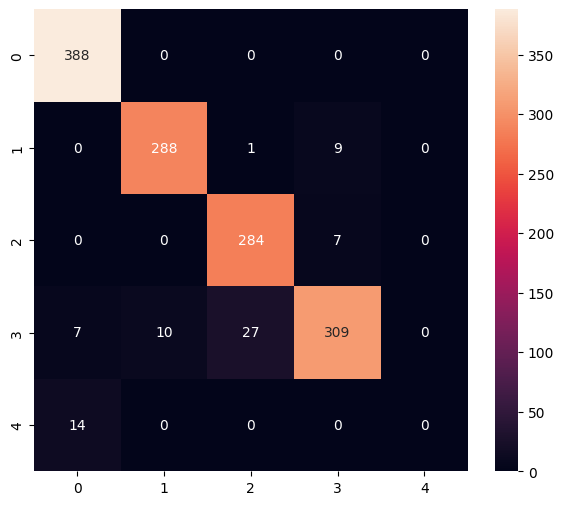

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       388
           1       0.97      0.97      0.97       298
           2       0.91      0.98      0.94       291
           3       0.95      0.88      0.91       353
           4       0.00      0.00      0.00        14

    accuracy                           0.94      1344
   macro avg       0.76      0.76      0.76      1344
weighted avg       0.93      0.94      0.94      1344



C:\Users\quay\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\quay\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\quay\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [26]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [27]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [28]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\quay\AppData\Local\Temp\tmplg9j_0dd\assets


INFO:tensorflow:Assets written to: C:\Users\quay\AppData\Local\Temp\tmplg9j_0dd\assets


Saved artifact at 'C:\Users\quay\AppData\Local\Temp\tmplg9j_0dd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1765012800528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1765012801680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1765012800912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1765012802832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1765012803024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1765012803600: TensorSpec(shape=(), dtype=tf.resource, name=None)


6472

# 推論テスト

In [29]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [30]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [31]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [32]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9051836  0.01525934 0.01610233 0.01814321 0.04531143]
0
